In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import torch
import pandas as pd
from sklearn.metrics import roc_auc_score
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D

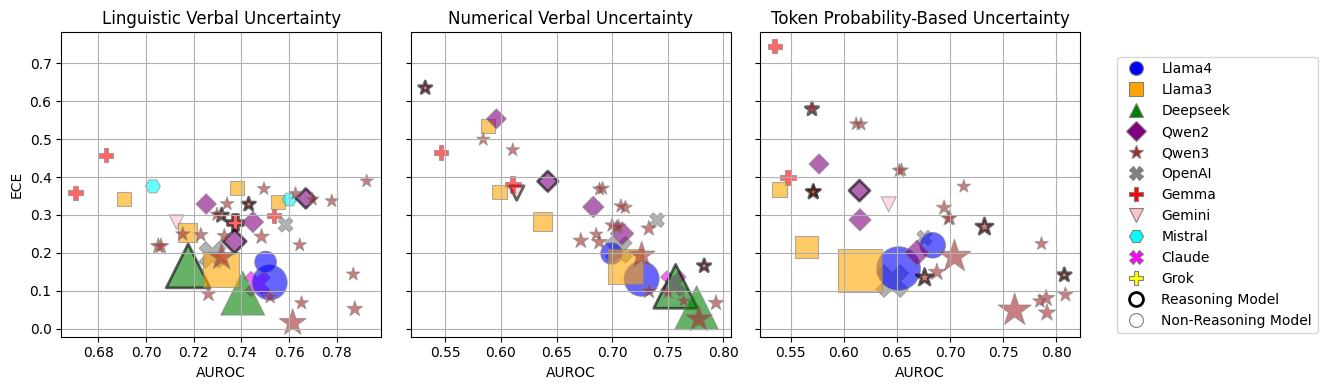

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D

# Load data
model_info = pd.read_csv("https://docs.google.com/spreadsheets/d/1BftP08doGAxTfq4O4mpO4yM8kTbigyviZDnm1RHh9SI/gviz/tq?tqx=out:csv&sheet=model_info").dropna(how='all').dropna(axis=1, how='all')
eval_results = pd.read_csv('https://docs.google.com/spreadsheets/d/1BftP08doGAxTfq4O4mpO4yM8kTbigyviZDnm1RHh9SI/gviz/tq?tqx=out:csv&sheet=model_stats').dropna(how='all').dropna(axis=1, how='all')
merged_data = pd.merge(eval_results, model_info, on='Model', how='inner')

# Confidence methods and abbreviations
confidence_methods = {
    "verbal linguistic": "LVU",
    "verbal numerical": "NVU",
    "logit perplexity": "TPU",
}

new_confidence_methods = {
    "verbal linguistic": "Linguistic Verbal",
    "verbal numerical": "Numerical Verbal",
    "logit perplexity": "Token Probability-Based",
}

# Model family style map
model_family_styles = {
    'Llama4':   ('blue', 'o'),
    'Llama3':   ('orange', 's'),
    'Deepseek': ('green', '^'),
    'Qwen2':    ('purple', 'D'),
    'Qwen3':    ('brown', '*'),
    'OpenAI':   ('gray', 'X'),
    'Gemma':    ('red', 'P'),
    'Gemini':   ('pink', 'v'),
    'Mistral':  ('cyan', 'H'),
    'Claude':   ('magenta', 'X'), 
    'Grok':     ('yellow', 'P'),  
}

palette = {fam: color for fam, (color, _) in model_family_styles.items()}
marker_map = {fam: marker for fam, (_, marker) in model_family_styles.items()}

# Family extractor
def get_family(model_name):
    for key in model_family_styles.keys():
        if key.lower() in model_name.lower():
            return key
    return 'Other'

# Plot setup
fig, axes = plt.subplots(1, 3, figsize=(11, 4), sharey=True)

# Shared filtered base data
base_data = merged_data[~merged_data['Model'].str.contains('-base')].copy()
base_data['Family'] = base_data['Model Family'].apply(get_family)
base_data['Edge Color'] = np.where(base_data['is Reasoning'], 'black', 'gray')
base_data['Line Width'] = np.where(base_data['is Reasoning'], 2.0, 0.8)

# Size scaling
min_size, max_size = 100, 1000
sizes = base_data['Model Size']
base_data['Scaled Size'] = np.interp(sizes, (sizes.min(), sizes.max()), (min_size, max_size))

# Plot each confidence method
for ax, (method, abbr) in zip(axes, confidence_methods.items()):
    data = base_data[base_data[f'AUROC {method} confidence'] > 0.53].copy()
    
    sns.scatterplot(
        ax=ax,
        data=data,
        x=f'AUROC {method} confidence',
        y=f'ECE {method} confidence',
        hue='Family',
        palette=palette,
        style='Family',
        markers=marker_map,
        edgecolor=data['Edge Color'],
        linewidth=data['Line Width'],
        size='Scaled Size',
        sizes=(min_size, max_size),
        alpha=0.6,
        legend=False
    )
    
    ax.set_title(f"{new_confidence_methods[method]} Uncertainty")
    ax.set_xlabel(f"AUROC")
    ax.set_ylabel(f"ECE")
    ax.grid(True)

# Build shared legend
legend_elements = [
    Line2D([0], [0], marker=marker_map[fam], color='w', label=fam,
           markerfacecolor=palette[fam], markeredgecolor='gray',
           markeredgewidth=0.8, linestyle='None', markersize=10)
    for fam in model_family_styles.keys()
    if fam in base_data['Family'].values
]

legend_elements += [
    Line2D([0], [0], marker='o', color='w', label='Reasoning Model',
           markerfacecolor='white', markeredgecolor='black',
           markeredgewidth=2.0, linestyle='None', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Non-Reasoning Model',
           markerfacecolor='white', markeredgecolor='gray',
           markeredgewidth=0.8, linestyle='None', markersize=10)
]

# Place shared legend on right
fig.legend(handles=legend_elements, bbox_to_anchor=(1.02, 0.5), loc='center left', borderaxespad=0.)

# Final layout
plt.tight_layout()  # leave space on the right for legend
plt.savefig('../plots/model_ece_vs_auroc_all_methods.pdf', bbox_inches='tight')
plt.show()


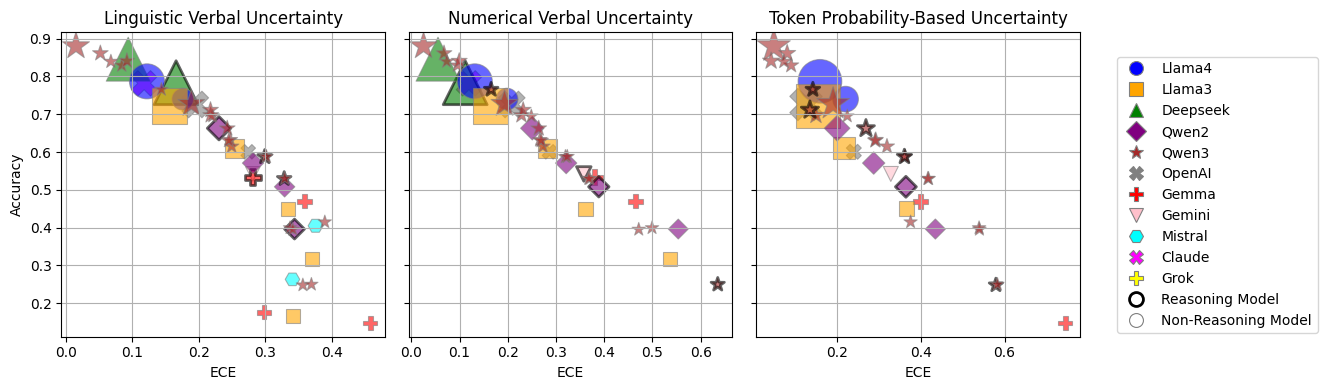

Index(['Model', 'n samples after dropna', 'Tokens more than 1024',
       'Tokens more than 2048', 'Tokens more than 4096',
       'Tokens more than 10240', 'Tokens more than 30000', 'Missing answer',
       'Missing verbal numerical confidence',
       'Missing logit perplexity confidence',
       'Missing verbal linguistic confidence', 'Accuracy',
       'Accuracy without na', 'ECE verbal numerical confidence',
       'ECE logit perplexity confidence', 'ECE verbal linguistic confidence',
       'AUROC verbal numerical confidence',
       'AUROC logit perplexity confidence',
       'AUROC verbal linguistic confidence',
       'Mean verbal numerical confidence', 'Mean logit perplexity confidence',
       'Mean verbal linguistic confidence', 'Std verbal numerical confidence',
       'Std logit perplexity confidence', 'Std verbal linguistic confidence',
       'Complete', 'Note', 'Model Name to Show', 'Model Family', 'Model Size',
       'Is MoE', 'is Reasoning', 'Is Instruct Tuning', 'R

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D

# Load data
model_info = pd.read_csv("https://docs.google.com/spreadsheets/d/1BftP08doGAxTfq4O4mpO4yM8kTbigyviZDnm1RHh9SI/gviz/tq?tqx=out:csv&sheet=model_info").dropna(how='all').dropna(axis=1, how='all')
eval_results = pd.read_csv('https://docs.google.com/spreadsheets/d/1BftP08doGAxTfq4O4mpO4yM8kTbigyviZDnm1RHh9SI/gviz/tq?tqx=out:csv&sheet=model_stats').dropna(how='all').dropna(axis=1, how='all')
merged_data = pd.merge(eval_results, model_info, on='Model', how='inner')

# Confidence methods and abbreviations
confidence_methods = {
    "verbal linguistic": "LVU",
    "verbal numerical": "NVU",
    "logit perplexity": "TPU",
}

new_confidence_methods = {
    "verbal linguistic": "Linguistic Verbal",
    "verbal numerical": "Numerical Verbal",
    "logit perplexity": "Token Probability-Based",
}

# Model family style map
model_family_styles = {
    'Llama4':   ('blue', 'o'),
    'Llama3':   ('orange', 's'),
    'Deepseek': ('green', '^'),
    'Qwen2':    ('purple', 'D'),
    'Qwen3':    ('brown', '*'),
    'OpenAI':   ('gray', 'X'),
    'Gemma':    ('red', 'P'),
    'Gemini':   ('pink', 'v'),
    'Mistral':  ('cyan', 'H'),
    'Claude':   ('magenta', 'X'), 
    'Grok':     ('yellow', 'P'),  
}

palette = {fam: color for fam, (color, _) in model_family_styles.items()}
marker_map = {fam: marker for fam, (_, marker) in model_family_styles.items()}

# Family extractor
def get_family(model_name):
    for key in model_family_styles.keys():
        if key.lower() in model_name.lower():
            return key
    return 'Other'

# Plot setup
fig, axes = plt.subplots(1, 3, figsize=(11, 4), sharey=True)

# Shared filtered base data
base_data = merged_data[~merged_data['Model'].str.contains('-base')].copy()
base_data['Family'] = base_data['Model Family'].apply(get_family)
base_data['Edge Color'] = np.where(base_data['is Reasoning'], 'black', 'gray')
base_data['Line Width'] = np.where(base_data['is Reasoning'], 2.0, 0.8)

# Size scaling
min_size, max_size = 100, 1000
sizes = base_data['Model Size']
base_data['Scaled Size'] = np.interp(sizes, (sizes.min(), sizes.max()), (min_size, max_size))

# Plot each confidence method
for ax, (method, abbr) in zip(axes, confidence_methods.items()):
    data = base_data[base_data[f'AUROC {method} confidence'] > 0.53].copy()
    
    sns.scatterplot(
        ax=ax,
        data=data,
        x=f'AUROC {method} confidence',
        y=f'Accuracy without na',
        hue='Family',
        palette=palette,
        style='Family',
        markers=marker_map,
        edgecolor=data['Edge Color'],
        linewidth=data['Line Width'],
        size='Scaled Size',
        sizes=(min_size, max_size),
        alpha=0.6,
        legend=False
    )
    
    ax.set_title(f"{new_confidence_methods[method]} Uncertainty")
    ax.set_xlabel(f"AUROC")
    ax.set_ylabel(f"Accuracy")
    ax.grid(True)

# Build shared legend
legend_elements = [
    Line2D([0], [0], marker=marker_map[fam], color='w', label=fam,
           markerfacecolor=palette[fam], markeredgecolor='gray',
           markeredgewidth=0.8, linestyle='None', markersize=10)
    for fam in model_family_styles.keys()
    if fam in base_data['Family'].values
]

legend_elements += [
    Line2D([0], [0], marker='o', color='w', label='Reasoning Model',
           markerfacecolor='white', markeredgecolor='black',
           markeredgewidth=2.0, linestyle='None', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Non-Reasoning Model',
           markerfacecolor='white', markeredgecolor='gray',
           markeredgewidth=0.8, linestyle='None', markersize=10)
]

# Place shared legend on right
fig.legend(handles=legend_elements, bbox_to_anchor=(1.02, 0.5), loc='center left', borderaxespad=0.)

# Final layout
plt.tight_layout()  # leave space on the right for legend
plt.savefig('../plots/model_accuracy_vs_auroc_all_methods.pdf', bbox_inches='tight')
plt.show()

# Model Size

/tmp/ipykernel_1536937/1484271144.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Family'] = 'instruct'
/tmp/ipykernel_1536937/1484271144.py:38: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignm

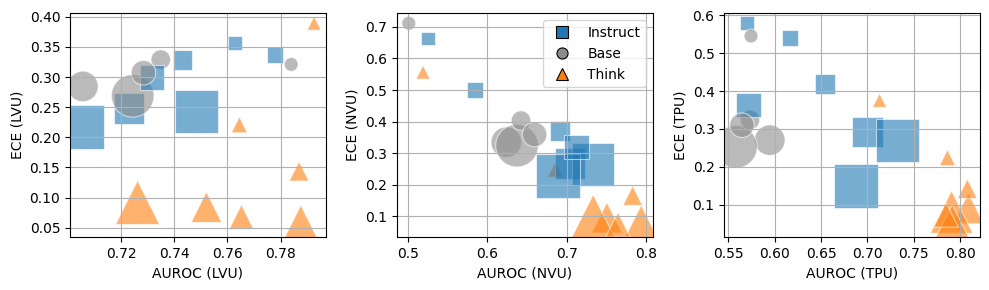

In [55]:
import pandas as pd
model_info = pd.read_csv("https://docs.google.com/spreadsheets/d/1BftP08doGAxTfq4O4mpO4yM8kTbigyviZDnm1RHh9SI/gviz/tq?tqx=out:csv&sheet=model_info").dropna(how='all').dropna(axis=1, how='all')
eval_results = pd.read_csv('https://docs.google.com/spreadsheets/d/1BftP08doGAxTfq4O4mpO4yM8kTbigyviZDnm1RHh9SI/gviz/tq?tqx=out:csv&sheet=model_stats').dropna(how='all').dropna(axis=1, how='all')

# Concatenate them together by column "Model"
merged_data = pd.merge(eval_results, model_info, on='Model', how='inner')

filtered_data = merged_data[
    (merged_data['Model Family'] == 'Qwen3') &
    (~merged_data['Model'].str.contains('-fp8')) &
    (~merged_data['Model'].str.contains('-A3B')) &
    (~merged_data['Model'].str.contains('-awq'))
]

CONFIDENCE_EXTRACTION_METHOD = "verbal numerical"


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D
palette = {
    'base': '#8c8c8c',       # medium gray
    'instruct': '#1f77b4',   # soft blue
    'think': '#ff7f0e'       # warm orange
}

marker_map = {
    'base': 'o',
    'instruct': 's',
    'think': '^'
}



filtered_data['Family'] = 'instruct'
filtered_data['Family'][filtered_data['Model'].str.contains('-base')] = 'base'
filtered_data['Family'][filtered_data['Model'].str.contains('-think')] = 'think'


# Step 3: Size scaling
min_size, max_size = 100, 1000
sizes = filtered_data['Model Size']
filtered_data['Scaled Size'] = np.interp(sizes, (sizes.min(), sizes.max()), (min_size, max_size))


# Step 4: Create figure
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# --- Custom Legend ---
legend_elements = [
    Line2D(
        [0], [0],
        marker=marker_map[fam],
        color='w',
        label=fam.capitalize(),
        markerfacecolor=palette[fam],
        markeredgecolor='black',
        markeredgewidth=0.8,
        markersize=8,
        linestyle='None'
    )
    for fam in ['instruct', 'base', 'think']
]

# --- Plot 1: verbal linguisti ---
sns.scatterplot(
    ax=axes[0],
    data=filtered_data,
    x=f'AUROC verbal linguistic confidence',
    y=f'ECE verbal linguistic confidence',
    hue='Family',
    palette=palette,
    style='Family',
    markers=marker_map,
    size='Scaled Size',
    sizes=(min_size, max_size),
    alpha=0.6,
    legend=False
)

# axes[0].set_title("AUROC vs ECE (Verbal Linguistic Uncertainty)")
axes[0].set_xlabel(f"AUROC (LVU)")
axes[0].set_ylabel(f"ECE (LVU)")
axes[0].grid(True)
# axes[0].set_xlim(left=0.65, right=0.8)


# --- Plot 2: verbal numerical ---
sns.scatterplot(
    ax=axes[1],
    data=filtered_data,
    x=f'AUROC verbal numerical confidence',
    y=f'ECE verbal numerical confidence',
    hue='Family',
    palette=palette,
    style='Family',
    markers=marker_map,
    size='Scaled Size',
    sizes=(min_size, max_size),
    alpha=0.6,
    legend=False
)

# axes[1].set_title("AUROC vs ECE (Numerical Verbal Uncertainty)")
axes[1].set_xlabel(f"AUROC (NVU)")
axes[1].set_ylabel(f"ECE (NVU)")
axes[1].grid(True)
# axes[1].set_xlim(left=0.65, right=0.8)

# --- Plot 3: logit perplexity ---
sns.scatterplot(
    ax=axes[2],
    data=filtered_data,
    x=f'AUROC logit perplexity confidence',
    y=f'ECE logit perplexity confidence',
    hue='Family',
    palette=palette,
    style='Family',
    markers=marker_map,
    size='Scaled Size',
    sizes=(min_size, max_size),
    alpha=0.6,
    legend=False
)

# axes[2].set_title("Token Probability-Based Uncertainty")
axes[2].set_xlabel(f"AUROC (TPU)")
axes[2].set_ylabel(f"ECE (TPU)")
axes[2].grid(True)
# axes[1].set_xlim(left=0.65, right=0.8)


axes[1].legend(handles=legend_elements)


# Final layout and save
plt.tight_layout()
plt.savefig(f'../plots/qwen3_ece_vs_auroc.pdf', bbox_inches='tight')
plt.show()

# Quantized models have comparable uncertainty est performane

/tmp/ipykernel_1536937/147471395.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Family'] = 'instruct'
/tmp/ipykernel_1536937/147471395.py:32: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignmen

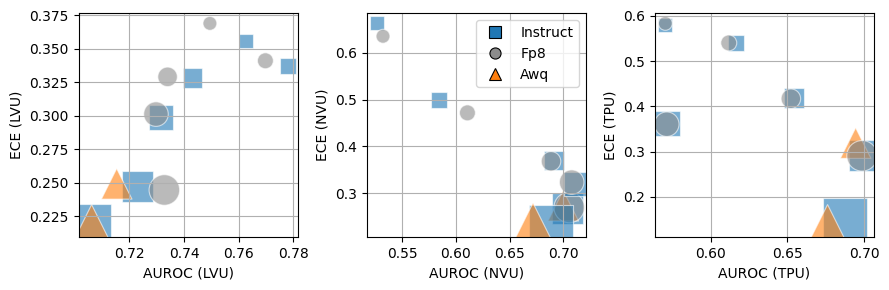

In [46]:
model_info = pd.read_csv("https://docs.google.com/spreadsheets/d/1BftP08doGAxTfq4O4mpO4yM8kTbigyviZDnm1RHh9SI/gviz/tq?tqx=out:csv&sheet=model_info").dropna(how='all').dropna(axis=1, how='all')
eval_results = pd.read_csv('https://docs.google.com/spreadsheets/d/1BftP08doGAxTfq4O4mpO4yM8kTbigyviZDnm1RHh9SI/gviz/tq?tqx=out:csv&sheet=model_stats').dropna(how='all').dropna(axis=1, how='all')

# Concatenate them together by column "Model"
merged_data = pd.merge(eval_results, model_info, on='Model', how='inner')

filtered_data = merged_data[
    (merged_data['Model Family'] == 'Qwen3') &
    (~merged_data['Model'].str.contains('-think')) &
    (~merged_data['Model'].str.contains('-a3b')) &
    (~merged_data['Model'].str.contains('-base')) &
    (~merged_data['Model'].str.contains('-tput')) 
]

CONFIDENCE_EXTRACTION_METHOD = "logit perplexity"

palette = {
    'instruct': '#1f77b4',   # soft blue
    'fp8': '#8c8c8c',       # medium gray
    'awq': '#ff7f0e'       # warm orange
}

marker_map = {
    'instruct': 's',
    'fp8': 'o',
    'awq': '^'
}



filtered_data['Family'] = 'instruct'
filtered_data['Family'][filtered_data['Model'].str.contains('-fp8')] = 'fp8'
filtered_data['Family'][filtered_data['Model'].str.contains('-awq')] = 'awq'

# Step 3: Size scaling
min_size, max_size = 100, 1000
sizes = filtered_data['Model Size']
filtered_data['Scaled Size'] = np.interp(sizes, (sizes.min(), sizes.max()), (min_size, max_size))

# Step 4: Create figure
fig, axes = plt.subplots(1, 3, figsize=(9, 3))

# --- Custom Legend ---
legend_elements = [
    Line2D(
        [0], [0],
        marker=marker_map[fam],
        color='w',
        label=fam.capitalize(),
        markerfacecolor=palette[fam],
        markeredgecolor='black',
        markeredgewidth=0.8,
        markersize=8,
        linestyle='None'
    )
    for fam in ['instruct', 'fp8', 'awq']
]

# --- Plot 1: verbal linguisti ---
sns.scatterplot(
    ax=axes[0],
    data=filtered_data,
    x=f'AUROC verbal linguistic confidence',
    y=f'ECE verbal linguistic confidence',
    hue='Family',
    palette=palette,
    style='Family',
    markers=marker_map,
    size='Scaled Size',
    sizes=(min_size, max_size),
    alpha=0.6,
    legend=False
)

# axes[0].set_title("AUROC vs ECE (Verbal Linguistic Uncertainty)")
axes[0].set_xlabel(f"AUROC (LVU)")
axes[0].set_ylabel(f"ECE (LVU)")
axes[0].grid(True)
# axes[0].set_xlim(left=0.65, right=0.8)


# --- Plot 2: verbal numerical ---
sns.scatterplot(
    ax=axes[1],
    data=filtered_data,
    x=f'AUROC verbal numerical confidence',
    y=f'ECE verbal numerical confidence',
    hue='Family',
    palette=palette,
    style='Family',
    markers=marker_map,
    size='Scaled Size',
    sizes=(min_size, max_size),
    alpha=0.6,
    legend=False
)

# axes[1].set_title("AUROC vs ECE (Numerical Verbal Uncertainty)")
axes[1].set_xlabel(f"AUROC (NVU)")
axes[1].set_ylabel(f"ECE (NVU)")
axes[1].grid(True)
# axes[1].set_xlim(left=0.65, right=0.8)

# --- Plot 3: logit perplexity ---
sns.scatterplot(
    ax=axes[2],
    data=filtered_data,
    x=f'AUROC logit perplexity confidence',
    y=f'ECE logit perplexity confidence',
    hue='Family',
    palette=palette,
    style='Family',
    markers=marker_map,
    size='Scaled Size',
    sizes=(min_size, max_size),
    alpha=0.6,
    legend=False
)

# axes[2].set_title("Token Probability-Based Uncertainty")
axes[2].set_xlabel(f"AUROC (TPU)")
axes[2].set_ylabel(f"ECE (TPU)")
axes[2].grid(True)
# axes[1].set_xlim(left=0.65, right=0.8)




axes[1].legend(handles=legend_elements)

# Final layout and save
plt.tight_layout()
plt.savefig(f'../plots/qwen3_quantization_effects.pdf', bbox_inches='tight')
plt.show()